In [3]:
# Conjunto de dados imaginarios, altura, peso, cachorro e cavalos
# Algoritmo de treino é guardar os dados, e o algoritmo preditor calcula as distancia do x até os demais pontos
# organiza os dados em ordem crescente de distância
# classifica a classe de acordo com a maioria dos primeiros K 'Valores"

In [46]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
init_notebook_mode(connected=True) 
cf.go_offline()


In [ ]:
dataFrame = pd.read_csv('Classified Data', index_col=0)
dataFrame.head()

In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [17]:
dataFrame.describe()

WTT          PTI          EQW          SBI          LQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.949682     1.114303     0.834127     0.682099     1.032336   
std       0.289635     0.257085     0.291554     0.229645     0.243413   
min       0.174412     0.441398     0.170924     0.045027     0.315307   
25%       0.742358     0.942071     0.615451     0.515010     0.870855   
50%       0.940475     1.118486     0.813264     0.676835     1.035824   
75%       1.163295     1.307904     1.028340     0.834317     1.198270   
max       1.721779     1.833757     1.722725     1.634884     1.650050   

               QWG          FDJ          PJF          HQE          NXJ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.943534     0.963422     1.071960     1.158251     1.362725   
std       0.256121     0.255118     0.288982     0.293738     0.204225   
min       0.262389     0.295228     0.299476     0.365157     0.639693   
25%       0.761064     0.784407     0.866306     0.934340     1.222623   
50%       0.941502     0.945333     1.065500     1.165556     1.375368   
75%       1.123060     1.134852     1.283156     1.383173     1.504832   
max       1.666902     1.713342     1.785420     1.885690     1.893950   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

## Aplicando Regressão de Logistica

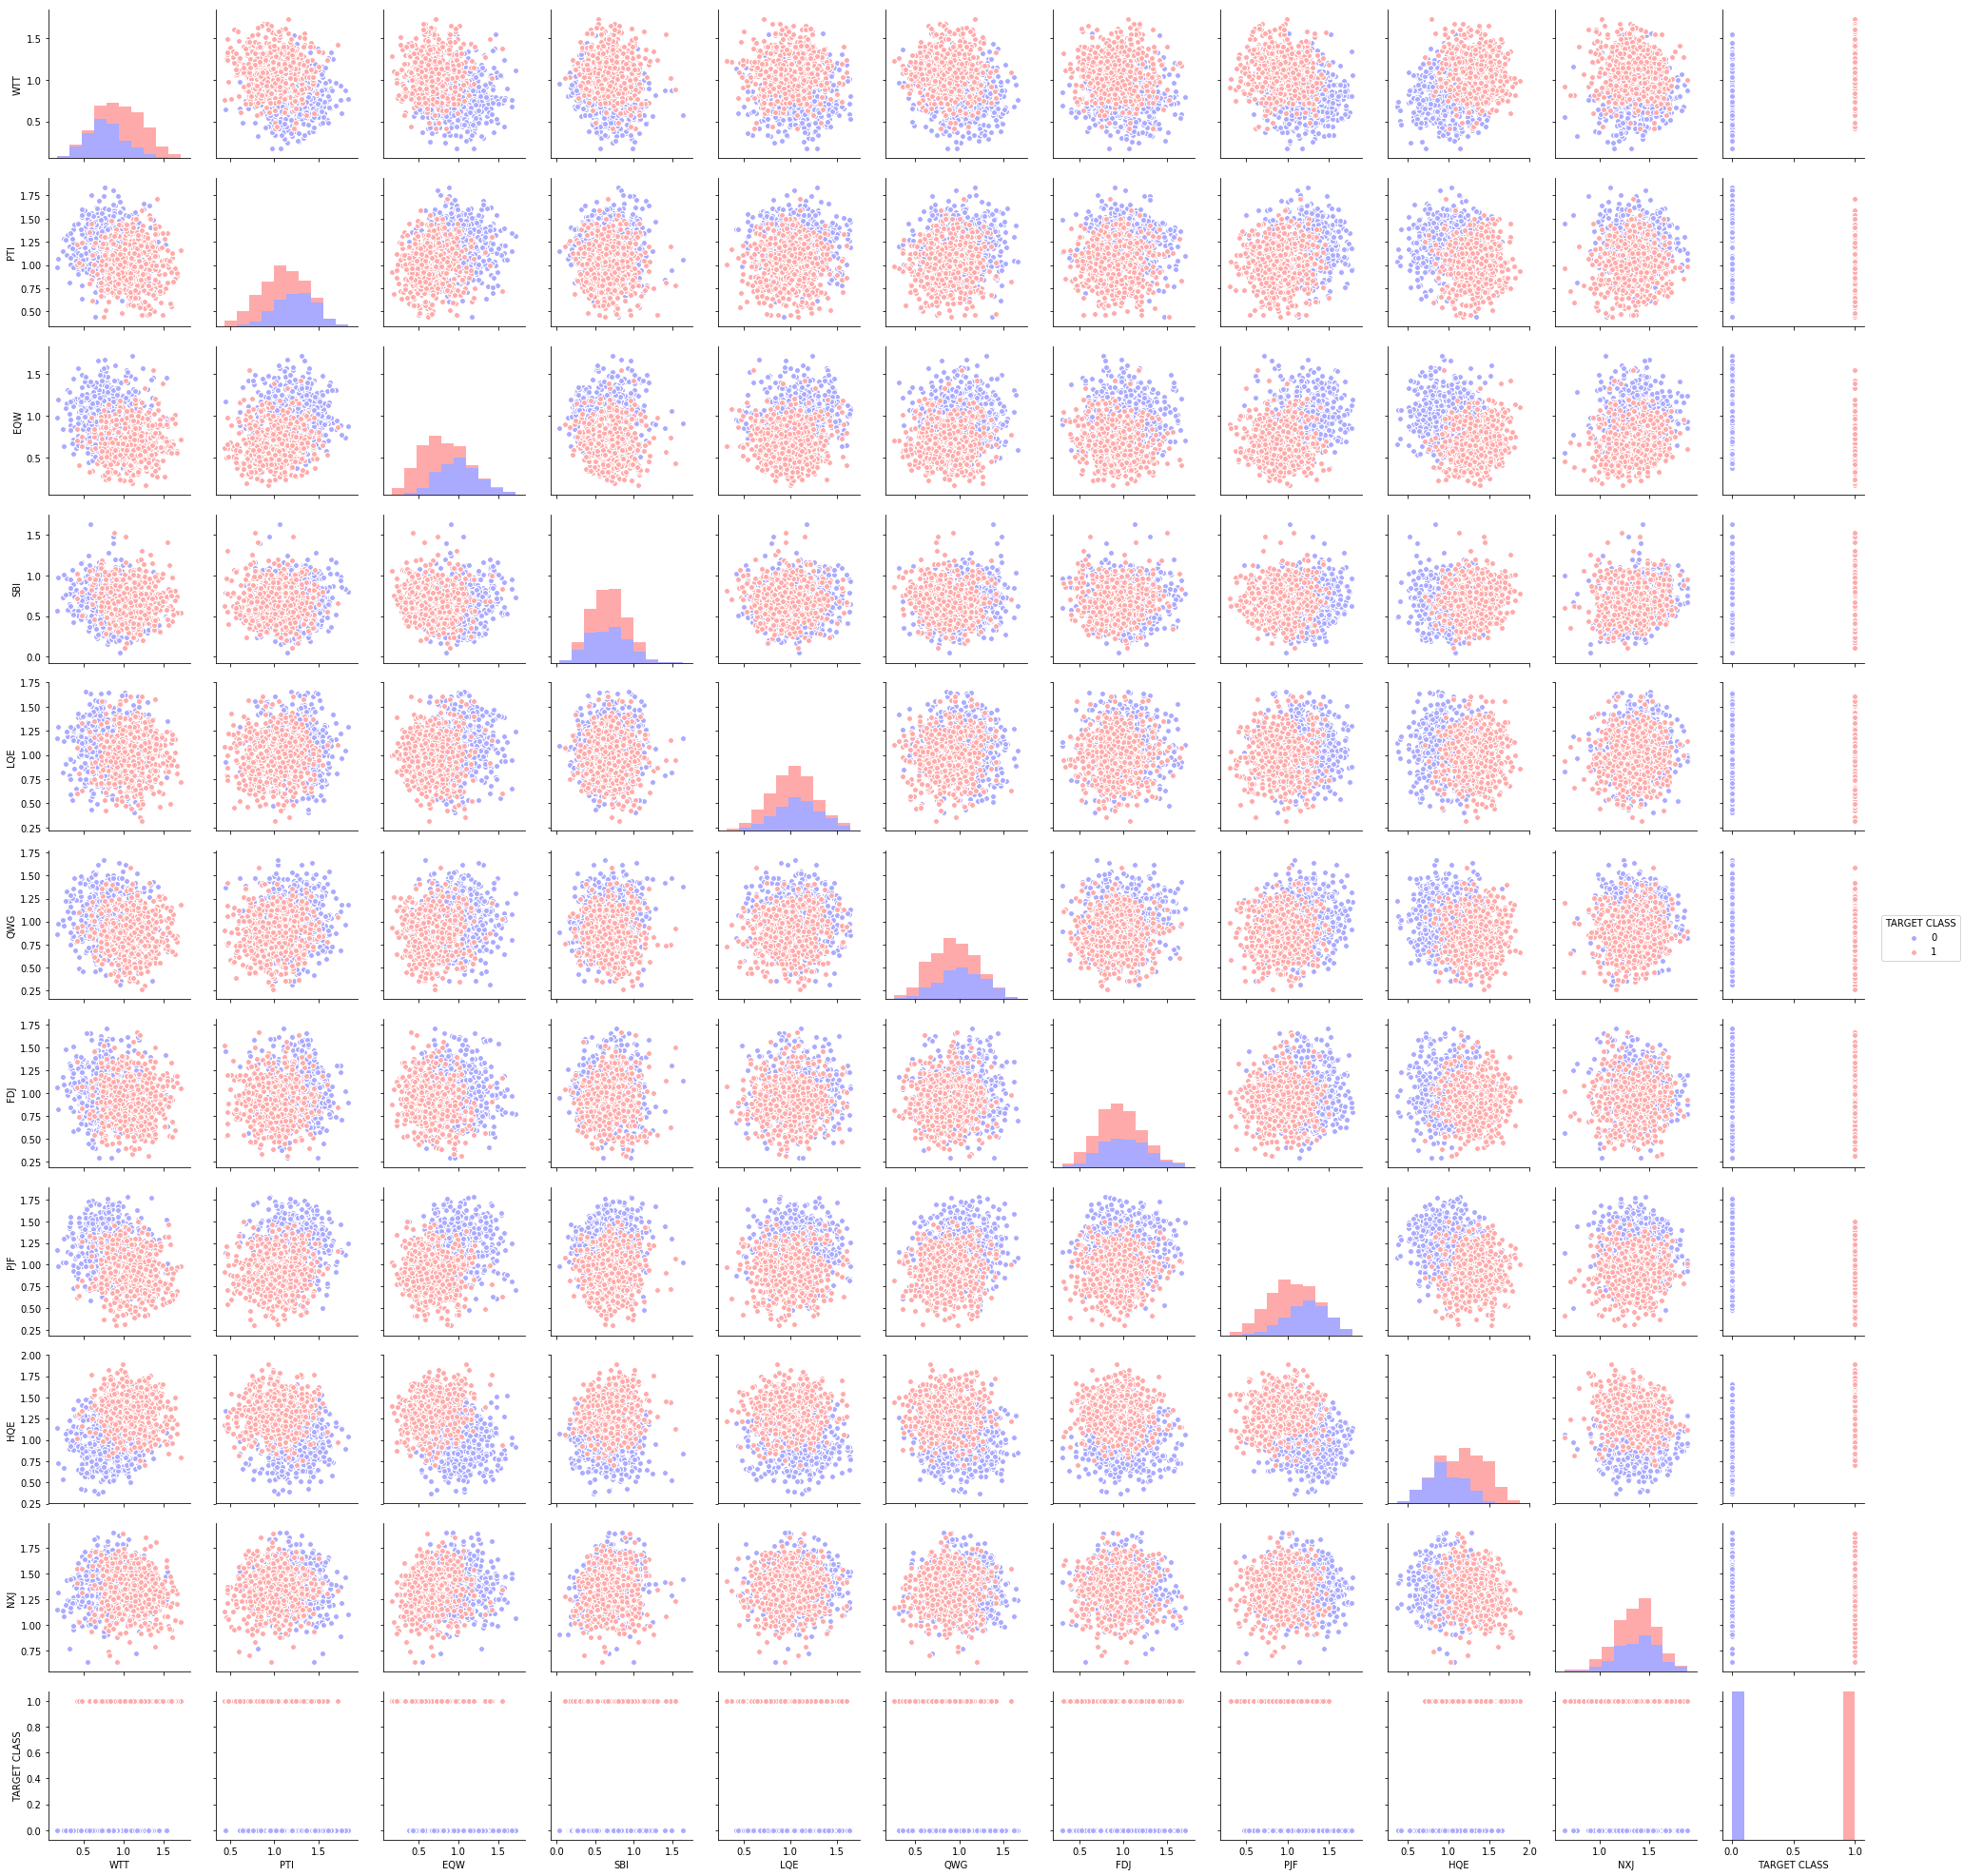

In [11]:
sns.pairplot(dataFrame,hue='TARGET CLASS',palette='bwr')

In [15]:
X = dataFrame.drop('TARGET CLASS',axis=1)
y = dataFrame['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       155
          1       0.98      0.95      0.97       175

avg / total       0.96      0.96      0.96       330



In [16]:
print(confusion_matrix(y_test,predictions))

[[151   4]
 [  8 167]]


## Aplicando KNN

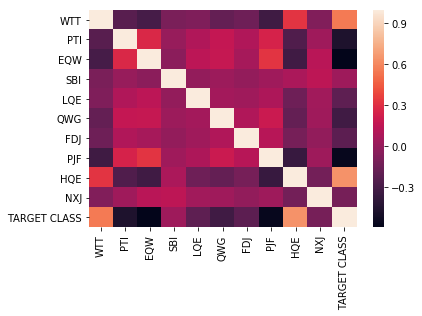

In [26]:
dataFrame = pd.read_csv('Classified Data', index_col=0)
sns.heatmap(dataFrame.corr())

In [35]:
##sempre normalizar as informações pra usar o knn
ss = StandardScaler() ##treinar essa base tambem
ss.fit(dataFrame.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
dataFrameNormalizado = ss.transform(dataFrame.drop('TARGET CLASS',axis=1)) ##transformar o mesmo conjunto de dados

In [38]:
df_Parametros = pd.DataFrame(dataFrameNormalizado, columns=dataFrame.columns[:-1])

In [41]:
df_Parametros.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [55]:
X = df_Parametros
y = dataFrame['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predicoes = knn.predict(X_test)

In [59]:
print(classification_report(y_test,predicoes))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90       165
          1       0.90      0.90      0.90       165

avg / total       0.90      0.90      0.90       330



In [60]:
print(confusion_matrix(y_test,predicoes))

[[148  17]
 [ 16 149]]


In [64]:
## Calculo para melhorar o numero de vizinhos a ser calculado
taxa_erro = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicoes = knn.predict(X_test)
    taxa_erro.append(np.mean(predicoes!=y_test))

Text(0,0.5,'ErrorAssociado')

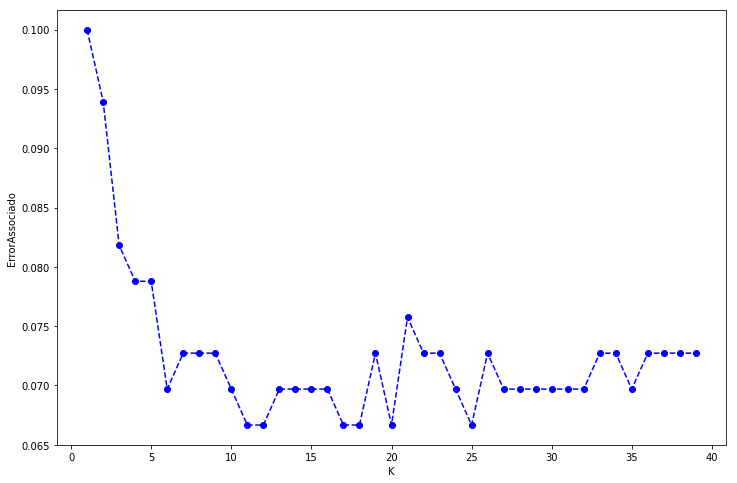

In [70]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),taxa_erro,color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('ErrorAssociado')

In [88]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
predicoes = knn.predict(X_test)
print(classification_report(y_test,predicoes))
print(confusion_matrix(y_test,predicoes))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       165
          1       0.91      0.95      0.93       165

avg / total       0.93      0.93      0.93       330

[[150  15]
 [  8 157]]
